# Matplotlib - Plotting

In [20]:
#!pip install datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (not needed for all problems but good to do anyways)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Line Chart

### Simple Example

[matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot)

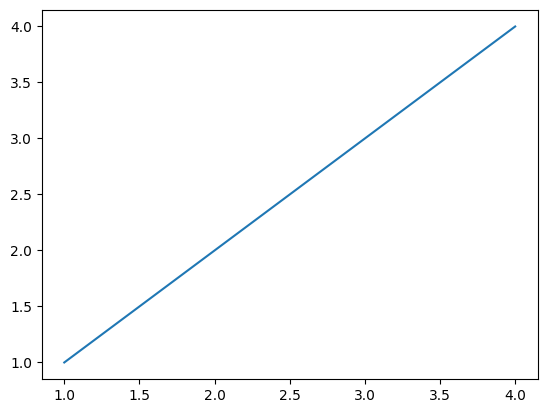

In [21]:
# Straight line to plot
# Use pyplot.plot to plot line chart
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()

### Plotting Job Postings Dates

In [22]:
df.job_posted_date.head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


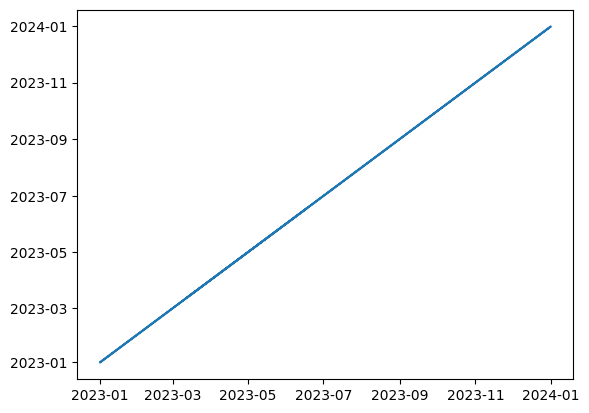

In [23]:
# Plot date over date (Straight line for demo purposes)
plt.plot(df.job_posted_date, df.job_posted_date)

In [24]:
# Perform aggregration to see how many job postings per date over time
date_counts = df.job_posted_date.value_counts()

print(date_counts)
print(type(date_counts))

job_posted_date
2023-08-24 11:35:33    10
2023-01-01 23:37:09    10
2023-01-01 14:07:23    10
2023-11-09 09:02:12    10
2023-06-20 17:19:57    10
                       ..
2023-06-08 07:43:38     1
2023-01-12 06:12:32     1
2023-10-16 06:01:53     1
2023-10-07 06:15:14     1
2023-06-07 06:18:29     1
Name: count, Length: 607192, dtype: int64
<class 'pandas.core.series.Series'>


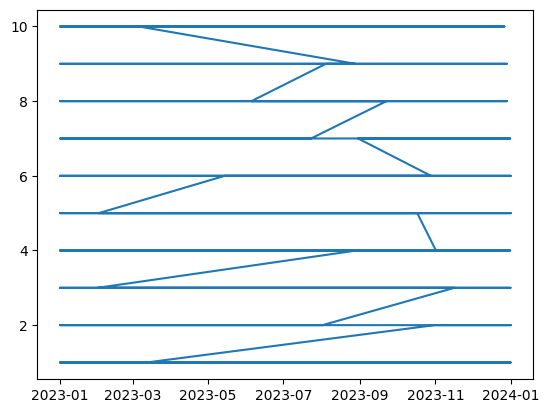

In [25]:
# Plot the series of date values(date_counts.index) and job posting counts(date_counts.values)
plt.plot(date_counts.index, date_counts.values)

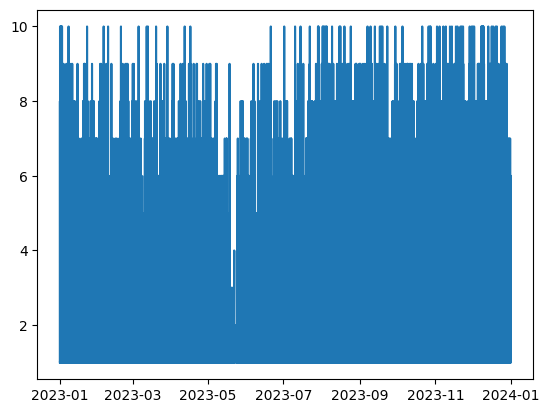

In [26]:
# Need to sort to get proper time series line chart
date_counts = date_counts.sort_index()

plt.plot(date_counts.index, date_counts.values)

In [27]:
# Clean up chart by aggregating by a larger grouping such as month in this case
df['job_posted_month'] = df['job_posted_date'].dt.month

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3


In [28]:
# reagggregate and sort
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


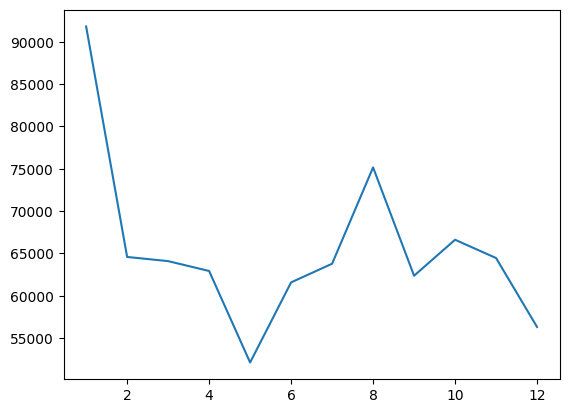

In [29]:
# Plot based on Monthly aggregation of job posting counts
plt.plot(monthly_counts.index, monthly_counts.values)
plt.show()

### Series vs DataFrame



*   One-Dimensional
*   Indexed
*   Diverse Data Types



In [33]:
# Pandas series example
series = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])

series

,0
a,10
b,20
c,30
d,40
e,50


In [34]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [35]:
series.values

array([10, 20, 30, 40, 50])

In [38]:
# columns in data frames are series
type(df.job_posted_date)

pandas.core.series.Series

# Bar Chart

### Vertical Bar Chart

[matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib-pyplot-bar)

In [47]:
# Aggregate series with count by using the series.value_counts() method
job_counts = df.job_title_short.value_counts().head(3)

job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286


<BarContainer object of 3 artists>

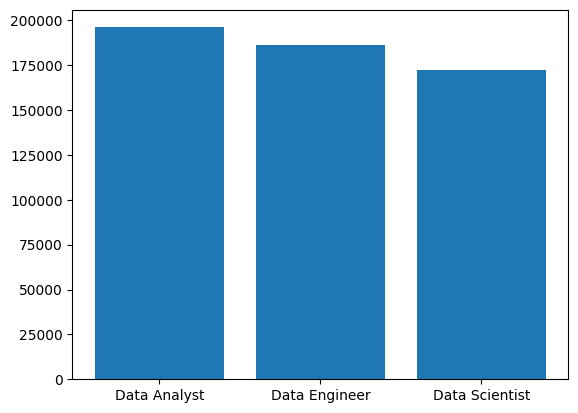

In [48]:
# Plot using pyplot.bar method
plt.bar(x=job_counts.index, height=job_counts.values)

### Horizontal Bar Chart

[matplotlib.pyplot.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib-pyplot-barh)

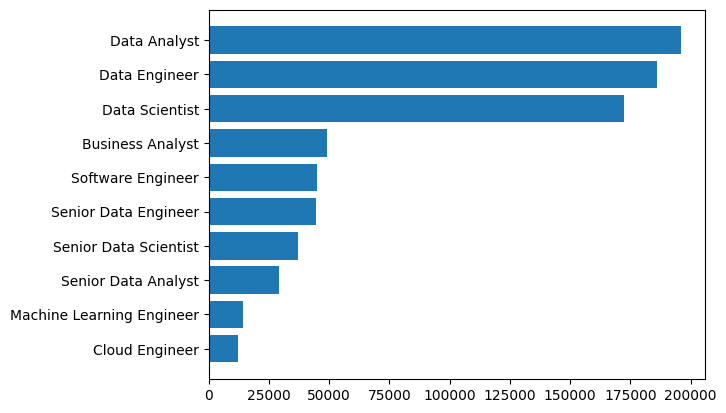

In [53]:
job_counts_2 = df.job_title_short.value_counts()

# Sort Values so they appear highest count to lowest count
job_counts_2 = job_counts_2.sort_values(ascending=True)

plt.barh(y=job_counts_2.index, width=job_counts_2.values)
plt.show()

# Problems

In [54]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (not needed for all problems but good to do anyways)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Job Country Bar Chart (1.29.1) - Problem

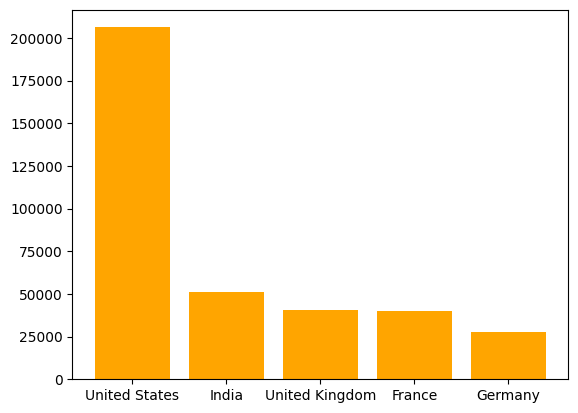

In [62]:
# Aggregate job postings by job country
job_country_count = df.job_country.value_counts().head()

plt.bar(x=job_country_count.index, height=job_country_count.values, color='orange')
plt.show()

## Average Salary Horizontal Bar Chart (1.29.2) - Problem

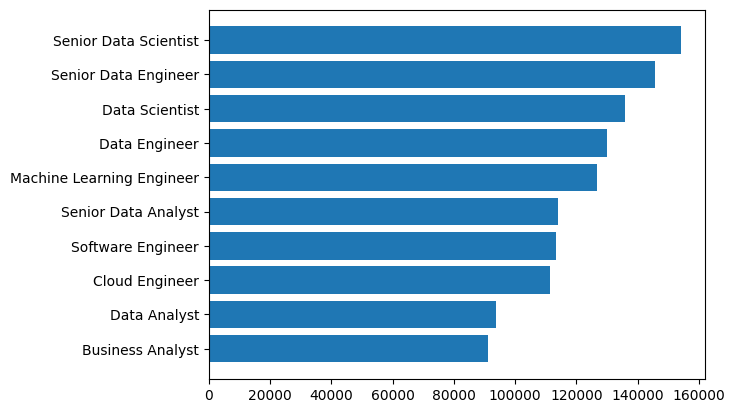

In [67]:
average_job_salary = df.groupby(by='job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

plt.barh(y=average_job_salary.index, width=average_job_salary.values)
plt.show()

## Average Salary Trend Line Plot (1.29.3) - Problem

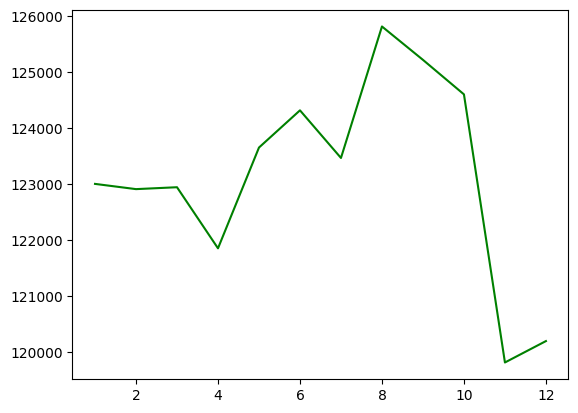

In [72]:
df['job_posted_month'] = df['job_posted_date'].dt.month

monthly_avg_salary = df.groupby('job_posted_month')['salary_year_avg'].mean().sort_index()

plt.plot(monthly_avg_salary.index, monthly_avg_salary.values, color='green')
plt.show()